In [1]:
import pandas as pd
import os
import json
from IPython.display import clear_output
from matplotlib import pyplot as plt
import numpy as np

In [2]:
def jsonRead(file_name):
    # Opening JSON file
    f = open(file_name)

    # returns JSON object as a dictionary
    data = json.load(f)
    return data

In [3]:
# seconds
time = 300
possible_strategies = ['CP', 'SAT', 'SMT']
strategy = 'SAT' # 'CP' | 'SAT' | 'SMT'

ins_test_idxs = range(1,41)
ins_test_idxs

csv_folder = os.path.join("csv_test")
plots_folder = os.path.join(csv_folder, "plots")
if not os.path.exists(csv_folder):
    os.makedirs(plots_folder)

In [4]:
def get_df(**args_dict):
    
    ###  path for out folder
    out_folder = os.path.join(args_dict['strategy'], 'out', model, args_dict.get('search', 'linear'))
    if strategy in ['SAT', 'SMT']:
        if args_dict.get('symmetry', False): out_folder = os.path.join(out_folder, 'symmetry')
        if args_dict.get('cumulative', False): out_folder = os.path.join(out_folder, 'cumulative')
            
    ###  structure of dataframe
    results = {
        "file":[],
        "makespan":[],
        "TOTAL_TIME":[],
        # "propagations":[],
        # "failures":[]
    }
    ### move out of src
    os.system('cd ..')
    ###  iterate over all the test ins
    for i in ins_test_idxs:
        file_in = "ins-"+str(i)
        
        ###  define script string 
        script_str = 'python '+strategy + '.py --model "' + model + '" --data "' + file_in + \
                        '" --time ' + str(args_dict.get('time', 300)) + \
                        ' --search "' + args_dict.get('search', 'linear')+'"'
        
        if args_dict.get('symmetry', False):
            script_str += ' --symmetry'
        if args_dict.get('cumulative', False):
            scripts_str += ' --cumulative'
            
        ###  run 
        os.system(script_str)
        
        file_out_path = os.path.join(out_folder, file_in+'.json')
        file_out = jsonRead(file_out_path)
        
        results['TOTAL_TIME'].append(file_out['TOTAL_TIME'])
        results['file'].append(file_in)
        time_elapsed = file_out['TOTAL_TIME']
        ###  if time exceeded 300'', makespan=max_makespan
        if time_elapsed < 300:
            results['makespan'].append(file_out['makespan'])
        else:
            results['makespan'].append(None)
        print(file_in)
        print('time: {:.2f}'.format(file_out['TOTAL_TIME']))

    # clear the cell output
    clear_output(wait=True)
    return pd.DataFrame(data=results)

In [5]:
def compare(df1, df2, ft, idf1, idf2):
    idf1 += ' '
    idf2 += ' '
    df = pd.concat([df1, df2], axis=1)
    df.columns = [*[idf1+f for f in df1.columns], *[idf2+f for f in df2.columns]]
    df.index = [ins[:-5] for ins in df[idf1+'file']]
    ax = df[[idf1+ft, idf2+ft]].plot.bar()
    ax.set_yscale("log")
    ax.set_xlabel("data ins")
    ax.set_ylabel(ft)
    ax.legend([idf1, idf2])
    ax.grid(True, axis='y')
    ax.set_title(ft, fontweight="bold")
    ax.set_facecolor("white")
    plt.savefig(os.path.join(plots_folder,
                             idf1 + "_" + idf2 + "_" + ft + ".png"))

## Base vs Rotation

In [6]:
model = 'base'
df_base = get_df(
    strategy = strategy, 
    model    = model
)
df_base.to_csv(os.path.join(csv_folder,
                               "df_"+strategy+"_"+model+'.csv'), 
                  index=False)
print("complete!")

complete!


In [7]:
model = 'rotation'
df_rotation = get_df(
    strategy = strategy, 
    model    = model
)
df_rotation.to_csv(os.path.join(csv_folder,
                               "df_"+strategy+"_"+model+'.csv'), 
                  index=False)
print("complete!")

complete!


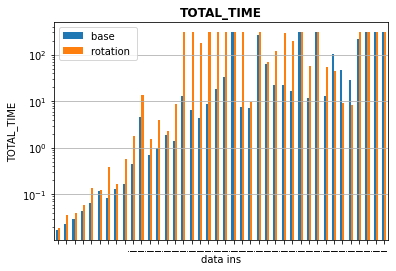

In [8]:
compare(df_base, df_rotation, 'TOTAL_TIME', 'base', 'rotation')

## Base vs symmetry

In [9]:
model = 'base'
df_sym = get_df(
    strategy = strategy, 
    model    = model, 
    symmetry = True
)
df_sym.to_csv(os.path.join(csv_folder,
                             "df_"+strategy+"_"+model+'_symmetry.csv'), 
                 index=False)
print("complete!")

complete!


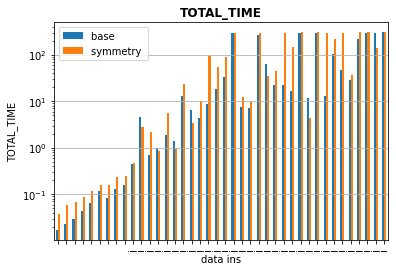

In [11]:
compare(df_base, df_sym, 'TOTAL_TIME', 'base', 'symmetry')

## Linear Search vs Binary Search

In [ ]:
df_binary = get_df(
    strategy = strategy, 
    model    = model, 
    search   = 'binary'
)
df_binary.to_csv(os.path.join(csv_folder,
                             "df_"+strategy+"_"+model+'_binary.csv'), 
                 index=False)
print("complete!")

ins-1
time: 0.02
ins-2
time: 0.02
ins-3
time: 0.03
ins-4
time: 0.04
ins-5
time: 0.06
ins-6
time: 0.12
ins-7
time: 0.09


In [ ]:
compare(df_base, df_binary, 'TOTAL_TIME', 'Linear', 'Binary')

## Base vs Cumulative

In [ ]:
df_binary = get_df(
    strategy   = strategy, 
    model      = model, 
    cumulative = True
)
df_binary.to_csv(os.path.join(csv_folder,
                             "df_"+strategy+"_"+model+'_cumulative.csv'), 
                 index=False)
print("complete!")

In [ ]:
compare(df_base, df_binary, 'TOTAL_TIME', 'Base', 'Cumulative')

In [ ]:
os.system('shutdown /h')